# Making into dataset

In [1]:
#importing the useful libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import tensorflow as tf

# Making the images into a dataset

the images will be in key 0 catagories in key 1 
* data[0] will return all the images 
* data[1] will return all the catagories

In [2]:
data = tf.keras.utils.image_dataset_from_directory("dataset",batch_size=16) # creates a labled dataset can change the batch size for speed and image size can be set using image_size=(100,100)
data1 = data.as_numpy_iterator() #converts to a numpy iterators
batch = data1.next() # gets the next 32 items16
batch[0]
#plt.imshow(batch[0][0]) #can test the first item like this

Found 96 files belonging to 2 classes.


array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

# Showing off a sample of the labled dataset

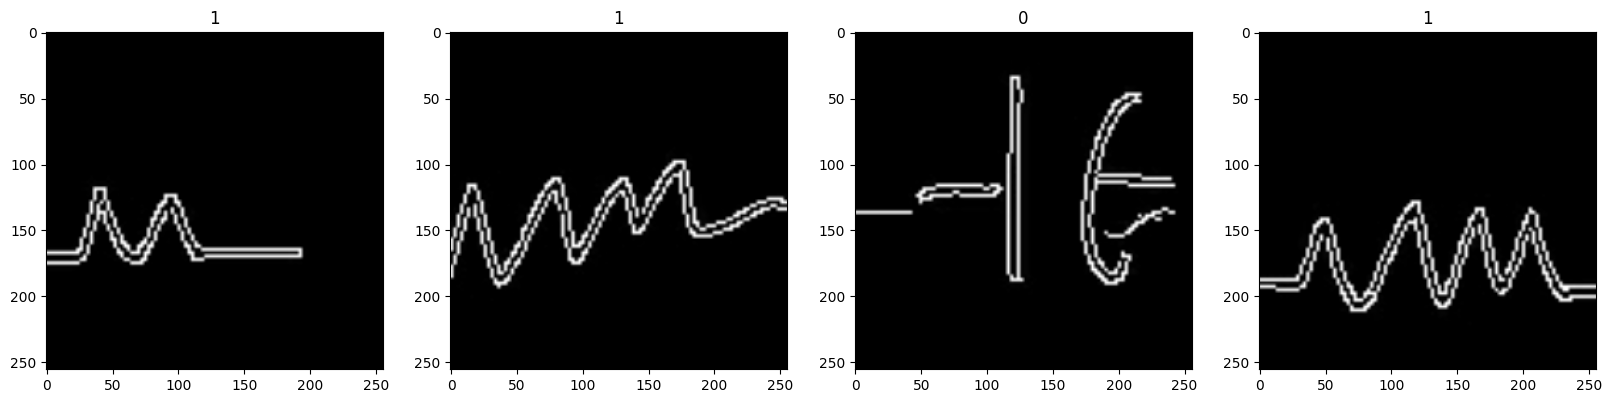

In [3]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow((img.astype(int)))
    ax[idx].title.set_text(batch[1][idx])


# Preproccessing the Data

Steps 
* scale the data from 0-255 to 0-1. this will help account for brightness and stuffs


In [4]:
dataScaled = data.map(lambda x, y: (x/255, y)) #scales all the data between 0 and 1 better for generilisation note need to do this on the pipelined data  
batch = (dataScaled.as_numpy_iterator().next())[0]
batch[0].max()

1.0

# Splitting the data into data, testing and validation

In [5]:
len(data) # the number of batches
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 # had to add them all up to total batch size a better way to do this def exists
print(train_size,test_size,val_size)

4 1 1


In [6]:
train = data.take(train_size) # splitting up the data between the 3 secitons
val = data.skip(train_size).take(val_size)
test = data.skip(test_size).skip(val_size).take(test_size)

# Begining the buidling the model 
* Sequential model type
* with lots of different types of layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout

In [8]:
model = Sequential()

model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape= (256,256,3))) #making a convolutional layer with number of filters = 16, 3x3 window , moves 1 pixel at a time 
model.add(MaxPooling2D()) # max pooling values returns the max value of the highest relu makes much faster

model.add(Conv2D(32,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())


model.add(Flatten()) # flatterns the data down condenses rows and width

model.add(Dense(256, activation= 'relu')) # fully connected layers with 256 neurons
model.add(Dense(1, activation='sigmoid')) # a signle values output might have to change this    

model.compile('adam', loss = tf._losses.BinaryCrossentropy(), metrics=['accuracy']) # using the adam optimiser with losses being 2 values - will have to cahnge this 


c:\Users\tlgwo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Displaying what the model looks like

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training the data

In [10]:
logsdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir) # estabilishing a log directory

# Fitting the data (training)

In [11]:
hist = model.fit(train,epochs=5,validation_data=val, callbacks=[tensorboard_callback]) # useful for ploting history


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6083 - loss: 32.3133 - val_accuracy: 0.8750 - val_loss: 3.6958
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9271 - loss: 2.6298 - val_accuracy: 0.9375 - val_loss: 4.6007
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9729 - loss: 0.5152 - val_accuracy: 1.0000 - val_loss: 2.1425e-09
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9771 - loss: 0.1269 - val_accuracy: 0.9375 - val_loss: 0.3198
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9271 - loss: 0.3203 - val_accuracy: 1.0000 - val_loss: 0.0109


# plotting the preformance

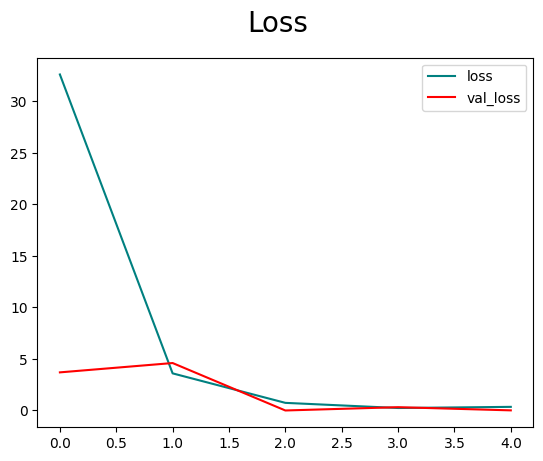

In [12]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')

fig.suptitle("Loss", fontsize = 20)
plt.legend()
plt.show()

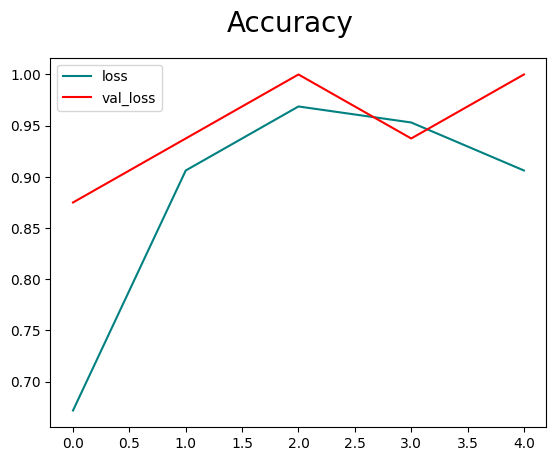

In [13]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'val_loss')

fig.suptitle("Accuracy", fontsize = 20)
plt.legend()
plt.show()

# Evaluation
Want to see how well this works on testing data

In [14]:
from tensorflow.keras.metrics import Precision, Recall ,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy() # might have to change this when we have more than 2 cats


In [15]:
for batch in test.as_numpy_iterator(): # interating through batch
    X,y = batch
    yhat = model.predict(X) # using the model to predict
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [16]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# Testing this one more data

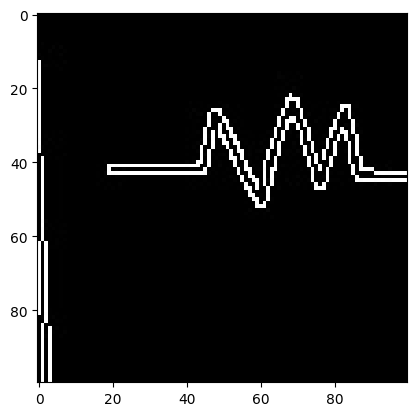

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.5058882]]
Its a resistor


In [20]:
#img = cv.imread("RandomCapTest.jpg")
img = cv.imread("dataset/R/R8_1.jpg")
testImg = cv.Canny(img,100,200)
resize = tf.image.resize(img,(256,256))
plt.imshow(img)
plt.show()


yhat = model.predict(np.expand_dims(resize/255,0)) # putting in in a list the nn can deal with not getting a batch
# note if greater that 0.5 it will be a R else cap
print(yhat)
if(yhat > 0.5):
    print("Its a resistor")
else:
    print("A capasitor at last")
